# House Prices: Advanced Regression Techniques

### Work developed by: Manuel Robalinho

21-7-2018

https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset.


### Query Documentation
<br> http://alanpryorjr.com/visualizations/seaborn/heatmap/heatmap/
<br> https://seaborn.pydata.org/tutorial/categorical.html
<br> http://pbpython.com/pandas-pivot-table-explained.html


### Data Description
MSSubClass: Identifies the type of dwelling involved in the sale.

MSZoning: Identifies the general zoning classification of the sale.

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

Alley: Type of alley access to property

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to various conditions

Condition2: Proximity to various conditions (if more than one is present)

BldgType: Type of dwelling

Conversion; originally built as one-family dwelling
       
HouseStyle: Style of dwelling

OverallQual: Rates the overall material and finish of the house

OverallCond: Rates the overall condition of the house

YearBuilt: Original construction date Year

RemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 

ExterCond: Evaluates the present condition of the material on the exterior

Foundation: Type of foundation

BsmtQual: Evaluates the height of the basement

BsmtCond: Evaluates the general condition of the basement

BsmtExposure: Refers to walkout or garden level walls

BsmtFinType1: Rating of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area Total

BsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

Romex wiring (Average)

1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

Low
QualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

Fireplace in main living area or Masonry Fireplace in basement
  
GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories
 
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale

SaleCondition: Condition of sale

In [3]:
# load the python packages
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In the Kaggle House Prices challenge we are given two sets of data:

<br> 1. A training set which contains data about houses and their sale prices.
<br> 2. A test set which contains data about a different set of houses, for which we would like to predict sale price.

In [4]:
# Read files
df_train = pd.read_csv("house_prices_train.csv")
df_test  = pd.read_csv('house_prices_test.csv')

## 1. Pre Processing

In [5]:
# Scan information files
df = df_train
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

### Numeric informations:
 <br> SalePrice - Preço   
 <br> YrSold - Ano de venda
 <br> MoSold - Mes de venda
 <br> MiscVal: $Value of miscellaneous feature - Valor de melhorias aplicadas no imovel   
 <br> PoolArea - are de piscina
 <br>  OpenPorchSF- Área de varanda aberta 
 <br>  WoodDeckS - Área de deck de madeira
 <br>  GarageCars: Size of garage in car capacity
 <br> GarageArea: Size of garage
 <br> Fireplaces - Number of fireplaces - NUmero lareiras
 <br> 1stFlrSF: First Floor square feet (m2 do 1 andar)
 <br> TotRmsAbvGrd: Total de quartos acima do nível (não inclui banheiros)
 <br> FullBath: banheiros completos acima do nível
 <br> Kitchen: Kitchens above grade (n. cozinhas)
 <br> LotFrontage: Pés lineares de rua conectados à propriedade
 <br> LotArea: Tamanho do lote em pés quadrados

### $We have:  1460,   entries$:

we have records with various null information, the most significant being::
<br>- PoolQC(piscina)  7 non-null object
<br>- Fence(cerca)     281 non-null objec
<br>- MiscFeature(melhorias)      54 non-null object
<br>- FireplaceQu(lareira)      770 non-null object
<br>- Alley(rua)                 91 non-null object

In [6]:
# Count null data in each column
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [7]:
# visualization some lines
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [8]:
# statistical measures
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Analysis of numerical columns
#### Note that there are very disparate columns in the column-by-column evaluation. This can be observed by the minimum and maximum values of the numeric columns
<br> -----------------------min  --- max
<br> LotFrontage =   21.0  -  313.0
<br> LotArea     = 1300.0   -  215245.0
<br> MasVnrArea(area alvenaria) = 0.0 - 1600.0
<br> MiscVal(melhorias)  = 0.0 - 15500.0


In [9]:
# Type data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [10]:
# For the columns that have missing data, one option is delete column because have many null itens,
# or replace the num entry by a default code.

# - PoolQC(piscina) 7 non-null object 
# - Fence(cerca) 281 non-null objec 
# - MiscFeature(melhorias) 54 non-null object 
# - FireplaceQu(lareira) 770 non-null object 
# - Alley(rua) 91 non-null object

# to erase the column use:
# del df['PoolQC']

In [11]:
#del df['Fence']

In [12]:
#del df['MiscFeature']

In [13]:
#del df['FireplaceQu']

## Missing Data

To get an overview of this, let’s find all columns with missing values and count how many each of them has:


In [315]:
# Counting missing values in X_Test and X_Train
def count_missing(data):
    null_cols = data.columns[data.isnull().any(axis=0)]
    X_null = data[null_cols].isnull().sum()
    X_null = X_null.sort_values(ascending=False)
    print(X_null)

# Concatenate df_train and df_test
data_X = pd.concat([df_train, df_test])

count_missing(data_X)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
GarageArea         1
dtype: int64


Some of the missing values are indeed significant. For example, missing values for features related to garage, pool or basement simply indicate that the house does not have a garage, pool or basement, respectively. In this case, it makes sense to fill in these missing values with something that captures this information.

For categorical resources, for example, we can replace missing values in such cases with a new value called "None":

In [316]:
catfeats_fillnaNone = \
    ['Alley',
    'BsmtCond','BsmtQual','BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature']
 
data_X.loc[:,catfeats_fillnaNone] = \
    data_X[catfeats_fillnaNone].fillna('None')

In [317]:
# Counting missing values in X_Test and X_Train

count_missing(data_X)

SalePrice       1459
LotFrontage      486
GarageYrBlt      159
MasVnrType        24
MasVnrArea        23
MSZoning           4
Utilities          2
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
Exterior1st        1
BsmtFinSF2         1
BsmtUnfSF          1
Electrical         1
GarageCars         1
Exterior2nd        1
GarageArea         1
TotalBsmtSF        1
KitchenQual        1
SaleType           1
BsmtFinSF1         1
dtype: int64


We see that the features no longer appear with null values:
<br> 'Alley',
    'BsmtCond','BsmtQual','BsmtExposure',
    'BsmtFinType1', 'BsmtFinType2',
    'FireplaceQu',
    'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'

For most numerical features of this kind, it makes sense to replace the missing values with zero:

In [318]:
numfeats_fillnazero = \
    ['BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF',
     'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
     'GarageArea', 'GarageCars']
 
data_X.loc[:,numfeats_fillnazero] = \
    data_X[numfeats_fillnazero].fillna(0)

In [319]:
# Counting missing values in X_Test and X_Train

count_missing(data_X)

SalePrice      1459
LotFrontage     486
GarageYrBlt     159
MasVnrType       24
MasVnrArea       23
MSZoning          4
Utilities         2
Functional        2
SaleType          1
KitchenQual       1
Exterior2nd       1
Exterior1st       1
Electrical        1
dtype: int64


We see that the features no longer appear with null values: 
<br> 'BsmtFullBath', 'BsmtHalfBath', 'TotalBsmtSF',
     'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
     'GarageArea', 'GarageCars'

For the GarageYrBuilt field, where the best course of action is less clear. If the house does not have a garage, how can we tell when it was built? The best solution will probably depend on the model we decided to use and now let’s fill it with YearBuilt:

In [320]:
# Data Missing for GarageYrBlt
data_X.loc[:,'GarageYrBlt'] = \
    data_X['GarageYrBlt'].fillna(data_X.YearBuilt)

In [321]:
# Counting missing values in X_Test and X_Train

count_missing(data_X)

SalePrice      1459
LotFrontage     486
MasVnrType       24
MasVnrArea       23
MSZoning          4
Utilities         2
Functional        2
SaleType          1
KitchenQual       1
Exterior2nd       1
Exterior1st       1
Electrical        1
dtype: int64


Some values still missing. We may assume that they are missing at random. In this case, there are three main options open to us: delete, impute or leave.

The crudest option is to simply replace each missing entry by the mean, median or mode of the given feature, which gives us the roughest possible estimate for what the missing value might be. We can implement this for our house prices dataset as follows (using mode and median for categorical and numerical features respectively):

In [322]:
# Fill Missing Values with MODE

catfeats_fillnamode = \
    ['Electrical', 'MasVnrType', 'MSZoning', 'Functional', 'Utilities',
     'Exterior1st', 'Exterior2nd', 'KitchenQual', 'SaleType']
 
data_X.loc[:, catfeats_fillnamode] = \
    data_X[catfeats_fillnamode].fillna(data_X[catfeats_fillnamode].mode().iloc[0])

In [323]:
# Fill Missing Values with MEDIAN

numfeats_fillnamedian = ['MasVnrArea', 'LotFrontage']
 
data_X.loc[:, numfeats_fillnamedian] = \
    data_X[numfeats_fillnamedian].fillna(data_X[numfeats_fillnamedian].median())

In [324]:
# Counting missing values in X_Test and X_Train

count_missing(data_X)

SalePrice    1459
dtype: int64


In [326]:
# Fill Missing Values with MEAN

numfeats_fillnamedian = ['SalePrice']
 
data_X.loc[:, numfeats_fillnamedian] = \
    data_X[numfeats_fillnamedian].fillna(data_X[numfeats_fillnamedian].mean())


In [327]:
# Counting missing values in X_Test and X_Train

count_missing(data_X)

Series([], dtype: float64)


In [328]:
# Count the number of features we have of each type:
data_X.dtypes.value_counts()

object     43
int64      26
float64    12
dtype: int64

In [329]:
# We can retrieve the names of features that are in fact non-numerical ‘objects’ as follows:
data_X.select_dtypes(include = [object]).columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'Neighborhood',
       'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition',
       'SaleType', 'Street', 'Utilities'],
      dtype='object')

### Ordinal features
Since ordinal features are inherently ordered, they lend themselves naturally to numerical encoding. For example, the possible values for LotShape are Reg (regular), IR1 (slightly irregular), IR2 (moderately irregular) and IR3 (irregular), to which we could assign the values (0,1,2,3) respectively:

In [330]:
# Convert LotShape to numbers
data_X.LotShape = \
    data_X.LotShape.replace({'Reg':0, 'IR1':1, 'IR2':2, 'IR3':3})

In [331]:
data_X.LotShape.head()

0    0
1    0
2    1
3    1
4    1
Name: LotShape, dtype: int64

In [332]:
# Verify all distinct values for a column - Utilities
data_X["Utilities"].value_counts()

AllPub    2918
NoSeWa       1
Name: Utilities, dtype: int64

In [333]:
# We have all values with the same carecteristic AllPub.
# We could delete this column

del data_X["Utilities"]

In [334]:
# Verify all distinct values for a column - Street
data_X["Street"].value_counts()

Pave    2907
Grvl      12
Name: Street, dtype: int64

In [335]:
# We have the most values with the same carecteristic Pave.
# We could delete this column - Street

del data_X["Street"]

### Ordinal encoding

There is nothing to stop us from applying ordinal encoding to categorical features as well.
For instance, we could assign integers to each possible category in alphabetical order or in order
of appearance in the dataset. 
As an example, let’s have a look at the first few Neighborhood entries in the test set:

In [336]:
data_X.Neighborhood.head(10)

0    CollgCr
1    Veenker
2    CollgCr
3    Crawfor
4    NoRidge
5    Mitchel
6    Somerst
7     NWAmes
8    OldTown
9    BrkSide
Name: Neighborhood, dtype: object

Applying ordinal encoding (in order of appearance), we get the following:

In [337]:
# Verify all distinct values for a column - Neighborhood
data_X["Neighborhood"].value_counts()

NAmes      443
CollgCr    267
OldTown    239
Edwards    194
Somerst    182
NridgHt    166
Gilbert    165
Sawyer     151
NWAmes     131
SawyerW    125
Mitchel    114
BrkSide    108
Crawfor    103
IDOTRR      93
Timber      72
NoRidge     71
StoneBr     51
SWISU       48
ClearCr     44
MeadowV     37
BrDale      30
Blmngtn     28
Veenker     24
NPkVill     23
Blueste     10
Name: Neighborhood, dtype: int64

In [338]:
# Create a List whith Values
target_names = data_X["Neighborhood"].unique()
target_names

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [346]:
# Create a dictionary whith Values and index
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'Blmngtn': 21,
 'Blueste': 24,
 'BrDale': 22,
 'BrkSide': 8,
 'ClearCr': 19,
 'CollgCr': 0,
 'Crawfor': 2,
 'Edwards': 15,
 'Gilbert': 17,
 'IDOTRR': 13,
 'MeadowV': 14,
 'Mitchel': 4,
 'NAmes': 11,
 'NPkVill': 20,
 'NWAmes': 6,
 'NoRidge': 3,
 'NridgHt': 10,
 'OldTown': 7,
 'SWISU': 23,
 'Sawyer': 9,
 'SawyerW': 12,
 'Somerst': 5,
 'StoneBr': 18,
 'Timber': 16,
 'Veenker': 1}

In [340]:
# Convert to numbers - Neighborhood
data_X.Neighborhood = data_X.Neighborhood.replace(target_dict)

In [341]:
data_X.Neighborhood.head()

0    0
1    1
2    0
3    2
4    3
Name: Neighborhood, dtype: int64

In [148]:
# Create dataframe backup
#data_Back = data_X
# Create dataframe with Neighborhood caracteristics
data_X1 = pd.get_dummies(data_X.Neighborhood, drop_first=True)

In [149]:
data_X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 24 columns):
Blueste    2919 non-null uint8
BrDale     2919 non-null uint8
BrkSide    2919 non-null uint8
ClearCr    2919 non-null uint8
CollgCr    2919 non-null uint8
Crawfor    2919 non-null uint8
Edwards    2919 non-null uint8
Gilbert    2919 non-null uint8
IDOTRR     2919 non-null uint8
MeadowV    2919 non-null uint8
Mitchel    2919 non-null uint8
NAmes      2919 non-null uint8
NPkVill    2919 non-null uint8
NWAmes     2919 non-null uint8
NoRidge    2919 non-null uint8
NridgHt    2919 non-null uint8
OldTown    2919 non-null uint8
SWISU      2919 non-null uint8
Sawyer     2919 non-null uint8
SawyerW    2919 non-null uint8
Somerst    2919 non-null uint8
StoneBr    2919 non-null uint8
Timber     2919 non-null uint8
Veenker    2919 non-null uint8
dtypes: uint8(24)
memory usage: 171.2 KB


In [150]:
data_X1.head()

,Blueste,BrDale,BrkSide,ClearCr,CollgCr,Crawfor,Edwards,Gilbert,IDOTRR,MeadowV,...,NoRidge,NridgHt,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [151]:
# Concatenate data_X and data_X1 and delete column Neighborhood
#data_X = pd.concat([data_X, data_X1])

#del data_X["Neighborhood"]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [347]:
data_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 79 columns):
1stFlrSF         2919 non-null int64
2ndFlrSF         2919 non-null int64
3SsnPorch        2919 non-null int64
Alley            2919 non-null object
BedroomAbvGr     2919 non-null int64
BldgType         2919 non-null object
BsmtCond         2919 non-null object
BsmtExposure     2919 non-null object
BsmtFinSF1       2919 non-null float64
BsmtFinSF2       2919 non-null float64
BsmtFinType1     2919 non-null object
BsmtFinType2     2919 non-null object
BsmtFullBath     2919 non-null float64
BsmtHalfBath     2919 non-null float64
BsmtQual         2919 non-null object
BsmtUnfSF        2919 non-null float64
CentralAir       2919 non-null object
Condition1       2919 non-null object
Condition2       2919 non-null object
Electrical       2919 non-null object
EnclosedPorch    2919 non-null int64
ExterCond        2919 non-null object
ExterQual        2919 non-null object
Exterior1st      29

However, we have introduced an artificial structure to our variable. This encoding effectively says that Northwest Ames < Gilbert < Stone Brook, etc, which has no basis in reality.

In [348]:
# Verify all distinct values for a column - BldgType
data_X["BldgType"].value_counts()

1Fam      2425
TwnhsE     227
Duplex     109
Twnhs       96
2fmCon      62
Name: BldgType, dtype: int64

In [350]:
# Convert BldgType to numbers
# Create a List whith Values
target_names = data_X["BldgType"].unique()
# Create a dictionary whith Values and index
target_dict = {n:i for i, n in enumerate(target_names)}
# Replace Values
data_X.BldgType = data_X.BldgType.replace(target_dict)

In [351]:
# Verify all distinct values for a column - BldgType
data_X["BldgType"].value_counts()

0    2425
3     227
2     109
4      96
1      62
Name: BldgType, dtype: int64

### Dummy encoding (aka one-hot encoding)

This method avoids the problem of imposing a numerical ordering on our categories altogether, 
though it comes at the expense of turning one feature into many. 
The basic idea is to create a new binary feature for each possible value of the original. 
This is easiest to understand with an example, so let’s return to the small snippet of Neighborhood data we looked at before.
We can apply dummy encoding to this as follows:

In [30]:
# Transform caracteristics with columns with 0 or 1
pd.get_dummies(data_X.Neighborhood.head(15), drop_first=True)

,CollgCr,Crawfor,Mitchel,NAmes,NWAmes,NoRidge,NridgHt,OldTown,Sawyer,Somerst,Veenker
0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,1,0,0,0,0,0,0
8,0,0,0,0,0,0,0,1,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0


## 2. Data exploration and visualization

## 1. Univariate analysis

### The distribution of the target variable and the individual characteristics
<br> To get an idea of the distribution of the numerical variables, make the histograms.
<br> Let's start by generating one for SalePrice, our target variable.

(array([  11.,   38.,   99.,  232.,  273.,  218.,  176.,  104.,   93.,
          58.,   42.,   35.,   24.,   10.,   17.,    8.,    7.,    4.,
           2.,    1.,    1.,    2.,    1.,    0.,    2.,    0.,    0.,
           0.,    0.,    2.]),
 array([  34900.        ,   58903.33333333,   82906.66666667,
         106910.        ,  130913.33333333,  154916.66666667,
         178920.        ,  202923.33333333,  226926.66666667,
         250930.        ,  274933.33333333,  298936.66666667,
         322940.        ,  346943.33333333,  370946.66666667,
         394950.        ,  418953.33333333,  442956.66666667,
         466960.        ,  490963.33333333,  514966.66666667,
         538970.        ,  562973.33333333,  586976.66666667,
         610980.        ,  634983.33333333,  658986.66666667,
         682990.        ,  706993.33333333,  730996.66666667,  755000.        ]),
 <a list of 30 Patch objects>)

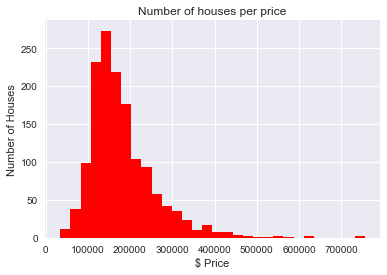

In [31]:
plt.title("Number of houses per price")
plt.xlabel("$ Price")
plt.ylabel("Number of Houses")
plt.hist(df.SalePrice, bins=30,  align=('mid'), color=['red'], label=['A'])

The largest number of offers is registered in houses with a price between $ 100,000.00, and: $ 200,000.00

Immediately we see that the distribution is for cheaper houses, with a relatively long tail
for homes with high prices. To make the distribution more symmetric, we can make the histogram of the logarithm:

(array([   3.,    2.,    0.,    2.,    3.,    7.,    5.,   10.,   39.,
          35.,   49.,  100.,  138.,  186.,  146.,  156.,  142.,  102.,
         100.,   68.,   52.,   44.,   22.,   24.,   12.,    4.,    3.,
           3.,    1.,    2.]),
 array([ 10.46024211,  10.56271647,  10.66519084,  10.7676652 ,
         10.87013956,  10.97261393,  11.07508829,  11.17756266,
         11.28003702,  11.38251138,  11.48498575,  11.58746011,
         11.68993448,  11.79240884,  11.8948832 ,  11.99735757,
         12.09983193,  12.2023063 ,  12.30478066,  12.40725502,
         12.50972939,  12.61220375,  12.71467812,  12.81715248,
         12.91962684,  13.02210121,  13.12457557,  13.22704994,
         13.3295243 ,  13.43199866,  13.53447303]),
 <a list of 30 Patch objects>)

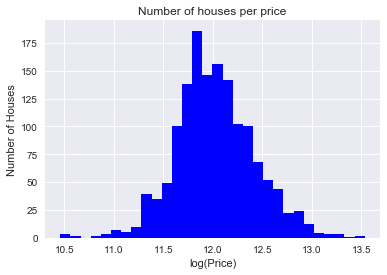

In [32]:
plt.title("Number of houses per price")
plt.xlabel("log(Price)")
plt.ylabel("Number of Houses")
plt.hist(np.log(df.SalePrice), bins=30,  align=('mid'), color=['blue'], label=['A'])

In addition to making the distribution more symmetrical, working with the logarithm of the selling price will also ensure that relative errors of cheaper and more expensive houses are treated equally.

### Analysis of Categorical Variables

For categorical variables, bar graphs and frequency counts are the natural analyzes for histograms

In [33]:
# Analyzing the Type of Construction (Foundation)
x= df.Foundation.value_counts()
x

PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

Foundation: Type of foundation:
<br>-BrkTil= 	Brick & Tile
<br>-CBlock= 	Cinder Block
<br>-PConc= 	Poured Contrete
<br>-Slab= 	Slab
<br>-Stone=	Stone
<br>-Wood=	Wood
<br><br>

Almost all homes are made of concrete, being concrete or concrete blocks only.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


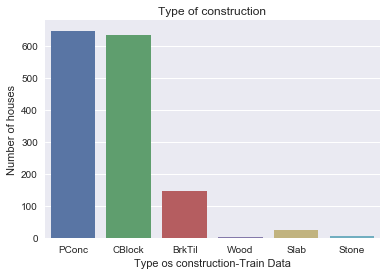

In [34]:
ax=sns.countplot(df.Foundation)
ax.set_title('Type of construction')
ax.set_ylabel('Number of houses')
ax.set_xlabel('Type os construction-Train Data')

Analyzing the same information in the test data (df_test), below, we see that they have the same behavior of the training data

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


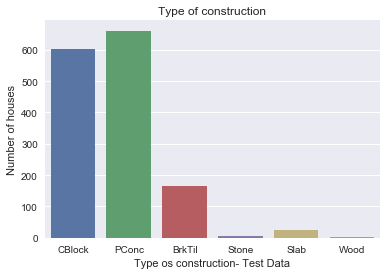

In [35]:
ax=sns.countplot(df_test.Foundation)
ax.set_title('Type of construction')
ax.set_ylabel('Number of houses')
ax.set_xlabel('Type os construction- Test Data')

## 2. Bivariate analysis

Having analyzed some of the variables individually, let's explore the relationships between them.
Of course, the most interesting will be the relationship between the target variable (selling price)
and the resources we will use for forecasting.

For numerical resources, scatter plots are the reference tool. As the total living area of ​​a home is probably an important factor in determining its price, we will create one for GrLivArea and SalePrice. We will plot the seating area against the log of the sale price as well as for comparison.

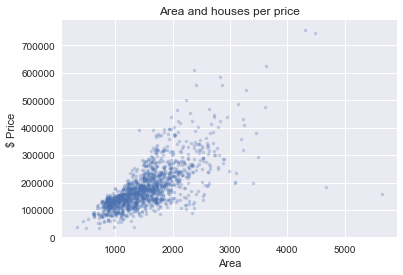

In [36]:
# Plot the area versus the price
plt.plot(df_train.GrLivArea, df_train.SalePrice,'.', alpha = 0.3)
plt.title("Area and houses per price")
plt.ylabel("$ Price")
plt.xlabel("Area")

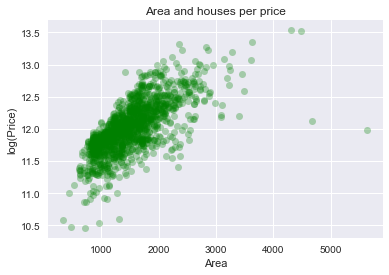

In [37]:
# Plot the area versus the price
plt.plot(df_train.GrLivArea, np.log(df_train.SalePrice),'o', color=('green'),alpha = 0.3)
plt.title("Area and houses per price")
plt.ylabel("log(Price)")
plt.xlabel("Area")

There is a strong dependence on the sale price of the total living area. As expected, the larger the home, the more expensive it tends to be. There is clearly a tendency to increase the selling price with the area, but we also see some points that do not seem to fit the rest. There are (a few) houses where the area / price pattern does not fit.

We would expect YearBuilt (year of construction) and GarageYrBlt (year of garage construction) to be perfectly related, so let's create a scatter chart for them. Since we are not considering SalePrice, we can use training and test data.

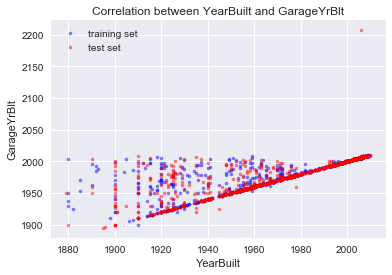

In [38]:
# Plot train Data 
plt.plot(df_train.YearBuilt, df_train.GarageYrBlt,
         '.', alpha=0.5, color=('blue'), label = 'training set')
# Plot test Data 
plt.plot(df_test.YearBuilt, df_test.GarageYrBlt,
         '.', alpha=0.5, color=('red'), label = 'test set')

plt.title("Correlation between YearBuilt and GarageYrBlt")
plt.ylabel("GarageYrBlt")
plt.xlabel("YearBuilt")
plt.legend()

As you would expect, the figure tells us that most garages were built at the same time as the houses to which they belong: they form the diagonal line that crosses the terrain. A significant number was also added later: these are the dots above the line.

In both training and test sets, we have several garages that were built up to 20 years before their homes (the points below the diagonal line), and in the training set we have a garage in the future where the record shows that it was built in year of 2018 (current). These amounts could be corrected to stay at least in the year of construction of the house.

## Categorical variables

Let's take a look at some examples of selling price depending on the neighborhood. Another feature that is likely to be important for our predictive models.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


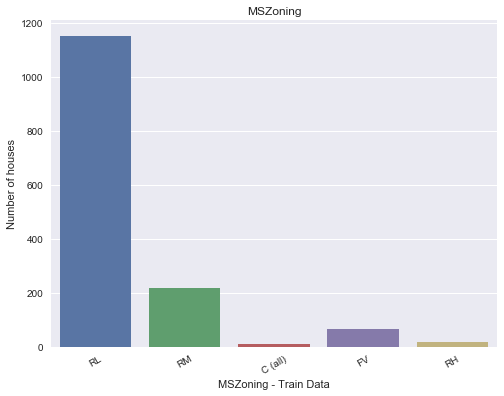

In [39]:
# Plot Number of houses for MSZoning
a4_dims = (8, 6)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.countplot(df_train.MSZoning)
ax.set_title('MSZoning')
ax.set_ylabel('Number of houses')
ax.set_xlabel('MSZoning - Train Data')
# Labels Rotation
g.set_xticklabels(g.get_xticklabels(), rotation=30)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


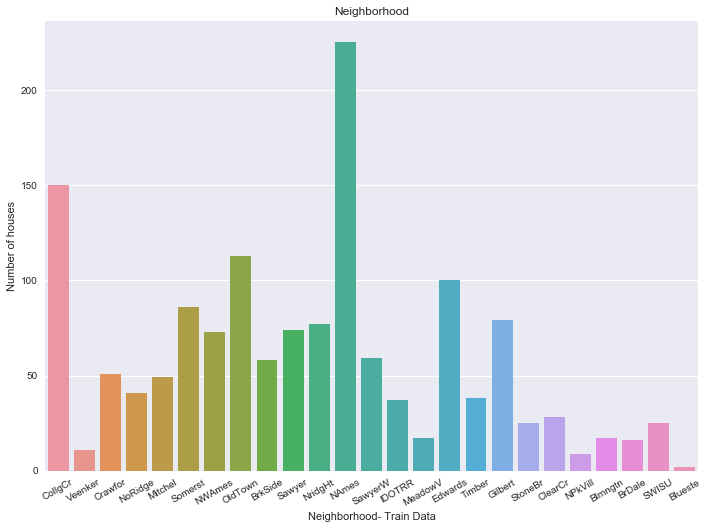

In [40]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
#sns.violinplot(ax=ax, data=df_test.Neighborhood)
g = sns.countplot(df_train.Neighborhood)
ax.set_title('Neighborhood')
ax.set_ylabel('Number of houses')
ax.set_xlabel('Neighborhood- Train Data')
# labels Rotation
g.set_xticklabels(g.get_xticklabels(), rotation=30)

The largest number of homes is located in NAames, followed by Old Town and CollgCr.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

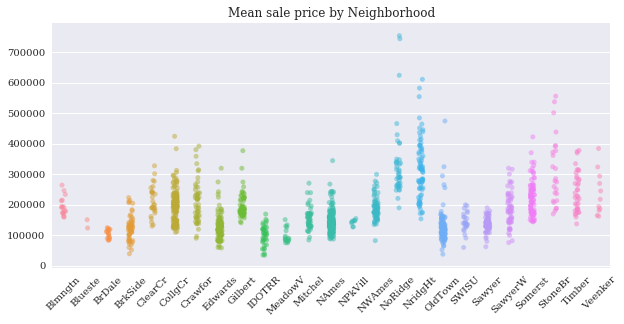

In [84]:
g=sns.stripplot(x = df_train.Neighborhood.values, y = df_train.SalePrice.values,
              order = np.sort(df_train.Neighborhood.unique()),
              jitter=0.1, alpha=0.5)
g.set_title('Mean sale price by Neighborhood')  
plt.xticks(rotation=45)

We can see the accumulation of prices in each neighborhood and the average prices where it is most reasonable.

In [353]:
# Mean Sales price by Neighborhood

df1 = df_train.groupby('Neighborhood')['SalePrice'].mean()
 
df1 = df1.sort_values()
df1

Neighborhood
MeadowV     98576.470588
IDOTRR     100123.783784
BrDale     104493.750000
BrkSide    124834.051724
Edwards    128219.700000
OldTown    128225.300885
Sawyer     136793.135135
Blueste    137500.000000
SWISU      142591.360000
NPkVill    142694.444444
NAmes      145847.080000
Mitchel    156270.122449
SawyerW    186555.796610
NWAmes     189050.068493
Gilbert    192854.506329
Blmngtn    194870.882353
CollgCr    197965.773333
Crawfor    210624.725490
ClearCr    212565.428571
Somerst    225379.837209
Veenker    238772.727273
Timber     242247.447368
StoneBr    310499.000000
NridgHt    316270.623377
NoRidge    335295.317073
Name: SalePrice, dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


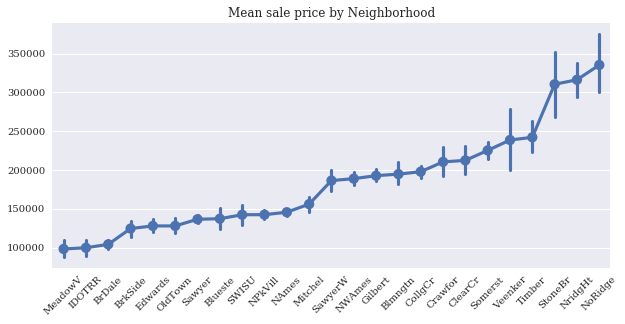

In [354]:
# Plot Mean SalesPrice by Neighborhood Ordered
g = sns.pointplot(x = df_train.Neighborhood.values, y = df_train.SalePrice.values,
              order = df1.index)
g.set_title('Mean sale price by Neighborhood') 
plt.xticks(rotation=45)
plt.show()

We have an idea of the average price per neighborhood. NoRidge has the highest price and MeadowV has de lowest.
The points represent the average sale price for each neighbourhood, while the vertical bars indicate the uncertainty in this value.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


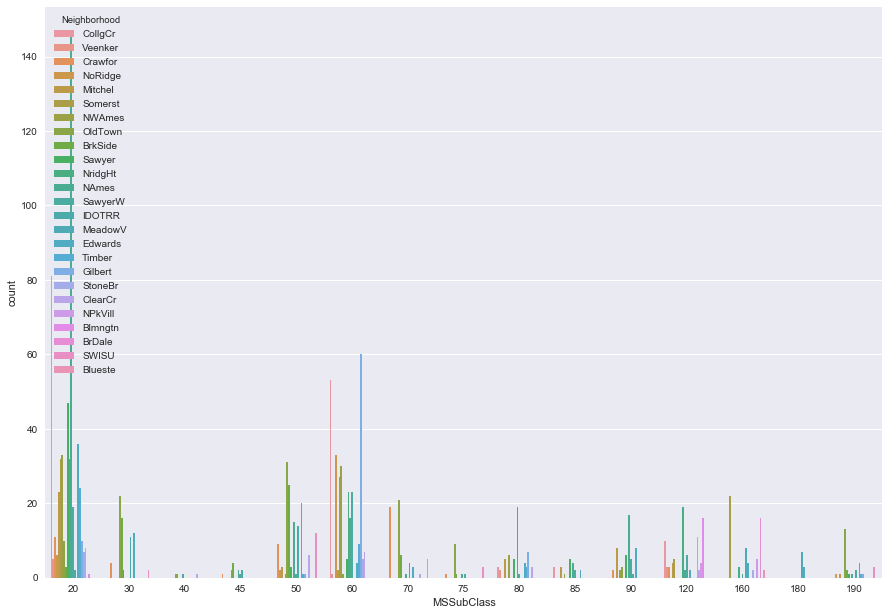

In [44]:
# Plot Multi-Characteristics with Counting

plt.rcParams['figure.figsize'] = (15.0, 10.5)
ax = sns.countplot(x="MSSubClass", hue="Neighborhood", data=df)

There is a great offer of houses of type:
    <br> - 20 = 1-STORY 1946 & NEWER ALL STYLES),
    <br> - followed by 60 = 2-STORY 1946 & NEWER
    <br> - and after 50 = 1-1 / 2 STORY FINISHED ALL AGES.
    <br> The other types are less representative.
<br><br> They are usually located in:
    <br> --Bluestem
    <br> --Sawyer
    <br> --Timberland
    <br> --Old Town
    

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


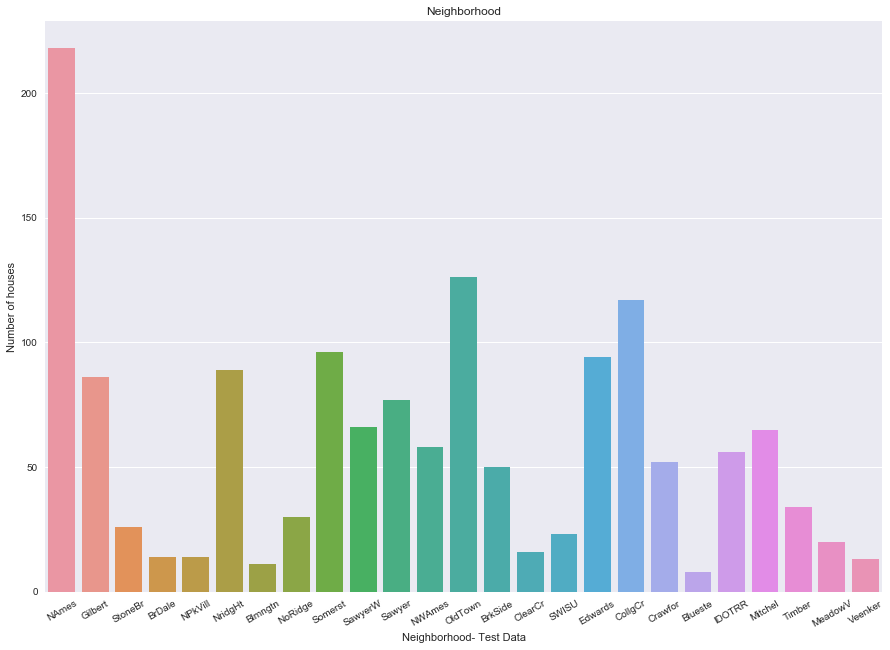

In [45]:
#  Plot number of houses by Neighborhood

ax=sns.countplot(df_test.Neighborhood)
ax.set_title('Neighborhood')
ax.set_ylabel('Number of houses')
ax.set_xlabel('Neighborhood- Test Data')
# labels Rotation
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


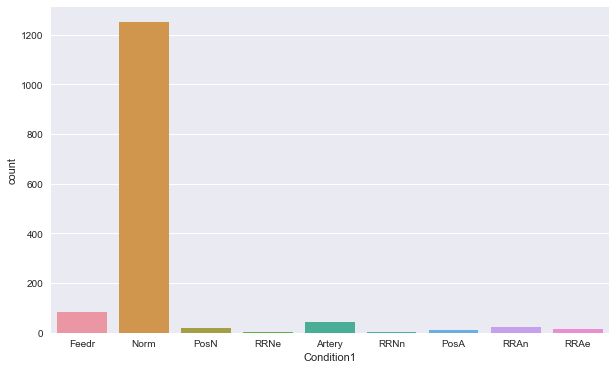

In [46]:
# Plot features with count.

ax.set_title('Proximity to various conditions')
ax.set_ylabel('Number of houses')
ax.set_xlabel('Proximity to- Test Data')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
ax = sns.countplot(df_test.Condition1)

Proximity information is not very relevant, since practically all of them are Norm = normal.
<br> There is some classification of houses (100 houses) with: Adjacent to feeder street
<br> There is some classification of houses (50 houses) with: Adjacent to arterial street


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002ACE90DDA58>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000002ACE9D824E0>]], dtype=object)

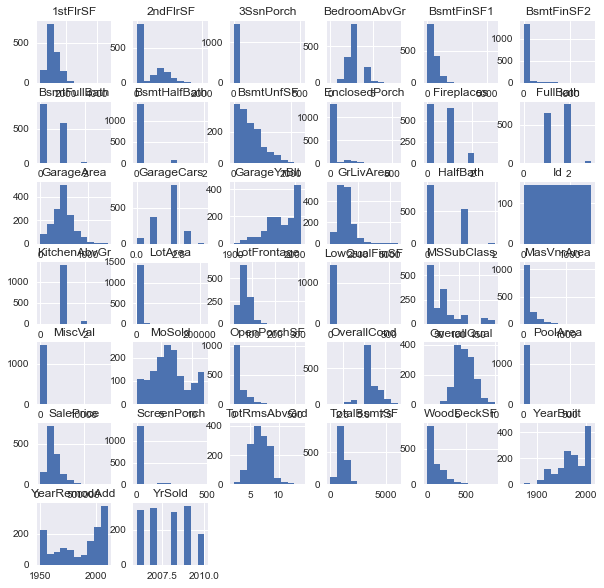

In [47]:
df.hist(figsize = (10,10))

In [48]:
alpha = df.columns
alpha

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

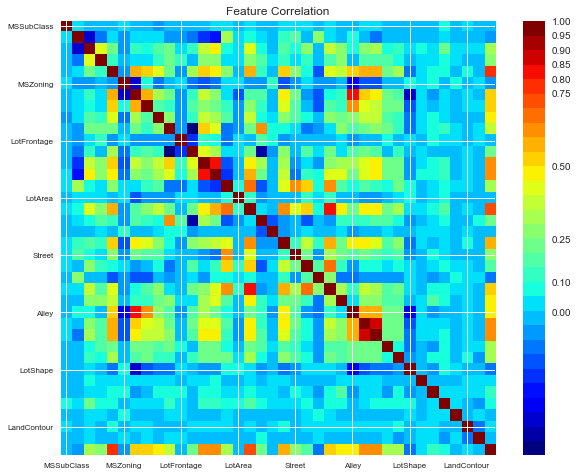

In [49]:
# Correlation of characteristics
# how much closer to 1 more related are the characteristics
alpha = df.columns

def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure(figsize=(10,8))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=alpha
    ax1.set_xticklabels(labels,fontsize=8)
    ax1.set_yticklabels(labels,fontsize=8)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0,5,0.10,0.25,0.50,.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)

Based on this graph, the dark points show the correlation of variables.
<br> MSZoning (zone) is related to Alley (type access to the property)
Home

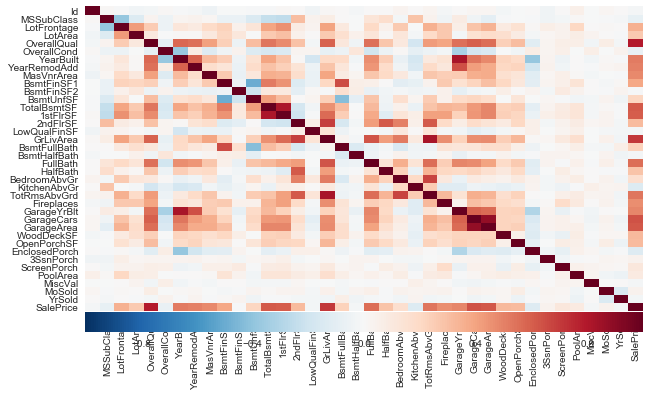

In [50]:
grid_kws = {"height_ratios": (1.5, 0.1), "hspace": 0.01}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws)
ax = sns.heatmap(df.corr(), ax=ax,
                 cbar_ax=cbar_ax,
                 cbar_kws={"orientation": "horizontal"})

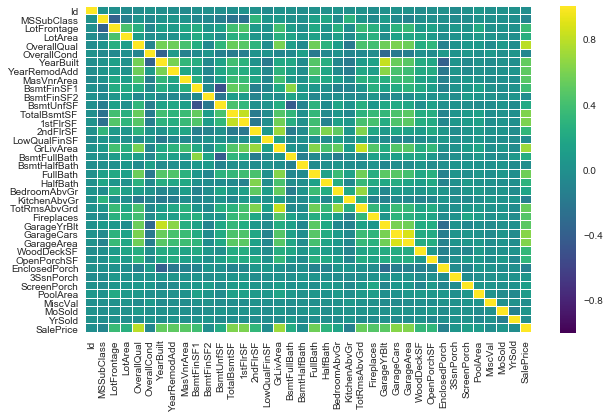

In [51]:
result = df.corr()
sns.heatmap(result, annot=False, fmt="g", cmap='viridis', cbar=True, linewidths=.05)
plt.show()

Based on this graph, the clearest points show the correlation of variables.
<br> MSZoning (zone) is related to Alley (type access to the property)
<br> The overall quality (OverallQual) is related to the Price (Salesprice)
<br> Other important correlations for the price are:
    <br> - Area 1 floor and area 2 floor
    <br> - the year in which improvements were made
    <br> - The year of construction
    <br> - m2 living area
    <br> - number of rooms
    <br> - number of bathrooms
    <br> - number of fireplaces
    <br> - garage area and number of parking spaces
<br> In general, the year of construction, the general quality of the property, the area and the number of rooms, lead the standard for price determination.

In [52]:
# Correlation analysis between data
# df.corr () determines the correlation between the variables
# clearer is higher correlation
# how much closer to 1 more related are the characteristics

# Alternative form to obtain plot of correlation
# sns.heatmap(df.corr(), annot = False)

In [53]:
# Correlation analysis between data
# df.corr () determines the correlation between the variables
# clearer is higher correlation
# how much closer to 1 more related are the characteristics

# Alternative form to obtain plot of correlation
# corr = df.corr()
# sns.heatmap(corr, 
#            xticklabels=corr.columns.values,
#            yticklabels=corr.columns.values)

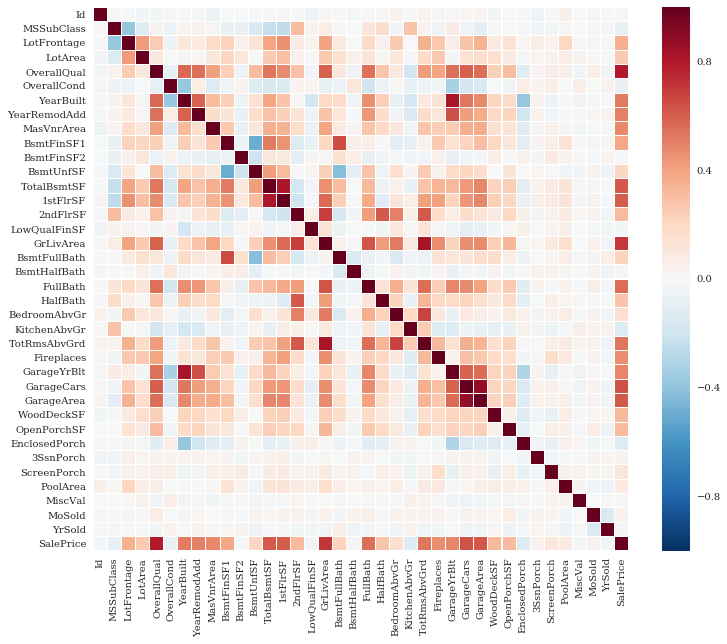

In [54]:
# Correlation analysis between data
# df.corr () determines the correlation between the variables
# clearer is higher correlation
# how much closer to 1 more related are the characteristics

# Alternative form to obtain plot of correlation
# Bigger plot because we have many columns
corr = df.corr()
plt.rcParams['figure.figsize'] = (12.0, 10.0)
plt.rcParams['font.family'] = "serif"
sns.heatmap(corr,linewidths=.05)

Based on this graph, the darker points show the correlation of variables.
<br> MSZoning (zone) is related to Alley (type access to the property)
<br> The overall quality (OverallQual) is related to the Price (Salesprice)
<br> Other important correlations for the price are:
    <br> - Area 1 floor and area 2 floor
    <br> - the year in which improvements were made
    <br> - The year of construction
    <br> - m2 living area
    <br> - number of rooms
    <br> - number of bathrooms
    <br> - number of fireplaces
    <br> - garage area and number of parking spaces
<br> In general, the year of construction, the general quality of the property, the area and the number of rooms, lead the standard for price determination.

In [55]:
list = df.columns
list

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [56]:

# Of the 1460 training lines, we practically do not have values ​​for the columns:
# - PoolQC, Fence, MiscFeature, and Alley
# Let's delete these columns

df1 = pd.DataFrame(df)
# df1 = pd.DataFrame(df)
# list = ['Alley','PoolQC','Fence','MiscFeature']
# df1 = df1.drop(list, axis=1)
df1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [57]:
list = df1.columns
list

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [58]:
# Analysis of Variables MSZoning ',' MSSubClass ',' SalePrice

df2 = df1[['MSZoning','MSSubClass','SalePrice']]

In [59]:
df2.head()

,MSZoning,MSSubClass,SalePrice
0,RL,60,208500
1,RL,20,181500
2,RL,60,223500
3,RL,70,140000
4,RL,60,250000


In [60]:
# put to plot the class under analysis "SalePrice"
# sns.pairplot(df2, hue = "SalePrice")

In [61]:
# Table with average prices in each zone, and count by type of property
X_pvt1 = pd.pivot_table(df, index=['MSSubClass'],
                              columns=['MSZoning'],
                               values=['SalePrice'],
                       aggfunc=[np.mean,np.count_nonzero], margins=True)
X_pvt1.head(25)

mean                                               \
           SalePrice                                                
MSZoning     C (all)             FV             RH             RL   
MSSubClass                                                          
20           45652.0  226289.538462  102966.666667  186467.039370   
30           57950.0            NaN   79000.000000   96481.212121   
40               NaN            NaN            NaN  196500.000000   
45               NaN            NaN   76000.000000  110050.000000   
50           91044.0            NaN  159434.000000  156277.477273   
60               NaN  248558.600000            NaN  239544.457875   
70           40000.0            NaN  124533.333333  199808.733333   
75               NaN            NaN            NaN  184750.000000   
80               NaN            NaN            NaN  169736.551724   
85               NaN            NaN            NaN  147810.000000   
90               NaN            NaN  144666.666667  132379.906977   
120              NaN  226140.000000  157000.000000  210029.491525   
160              NaN  164749.318182            NaN  164909.090909   
180              NaN            NaN            NaN            NaN   
190         133900.0            NaN  180000.000000  134662.500000   
All          74528.0  214014.061538  131558.375000  191004.994787   

                                         count_nonzero                      \
                                             SalePrice                       
MSZoning               RM            All       C (all)    FV    RH      RL   
MSSubClass                                                                   
20          121327.500000  185224.811567           2.0  13.0   3.0   508.0   
30           97983.969697   95829.724638           2.0   NaN   1.0    33.0   
40          115750.000000  156125.000000           NaN   NaN   NaN     2.0   
45          112414.285714  108591.666667           NaN   NaN   1.0     4.0   
50          124698.039216  143302.972222           4.0   NaN   1.0    88.0   
60          135000.000000  239948.501672           NaN  25.0   NaN   273.0   
70          138403.192308  166772.416667           1.0   NaN   3.0    30.0   
75          197050.000000  192437.500000           NaN   NaN   NaN     6.0   
80                    NaN  169736.551724           NaN   NaN   NaN    58.0   
85                    NaN  147810.000000           NaN   NaN   NaN    20.0   
90          136300.000000  133541.076923           NaN   NaN   3.0    43.0   
120         172920.952381  200779.080460           NaN   5.0   2.0    59.0   
160         109876.666667  138647.380952           NaN  22.0   NaN    11.0   
180         102300.000000  102300.000000           NaN   NaN   NaN     NaN   
190         112718.181818  129613.333333           1.0   NaN   2.0    16.0   
All         126316.830275  180921.195890          10.0  65.0  16.0  1151.0   

                         
                         
MSZoning       RM   All  
MSSubClass               
20           10.0   536  
30           33.0    69  
40            2.0     4  
45            7.0    12  
50           51.0   144  
60            1.0   299  
70           26.0    60  
75           10.0    16  
80            NaN    58  
85            NaN    20  
90            6.0    52  
120          21.0    87  
160          30.0    63  
180          10.0    10  
190          11.0    30  
All         218.0  1460

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


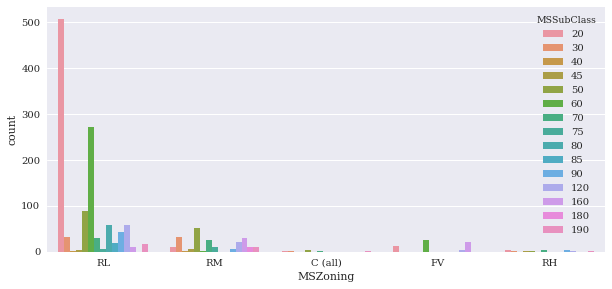

In [62]:
# Plot Multi-Characteristics with Counting Subclass
plt.rcParams['figure.figsize'] = (10.0, 4.5)
ax = sns.countplot(x="MSZoning", hue="MSSubClass", data=df2)

## The houses are located mostly in the RL (Residential Low Density) Zone.
In this context the classes of preferential houses are:
<br> 20 - STORY 1946 & NEWER ALL STYLES
<br> 50 - 1-1 / 2 STORY FINISHED ALL AGES
<br> 60 - 2-STORY 1946 & NEWER

In [63]:
# Table with average prices in each zone, by type of property and count number of houses
X_pvt1 = pd.pivot_table(df, index=['MSZoning'],
                              columns=['MSSubClass'],
                                values=['SalePrice'],
                      aggfunc=[np.mean,np.count_nonzero], margins=True)
X_pvt1

mean                                         \
                SalePrice                                          
MSSubClass             20            30        40             45   
MSZoning                                                           
C (all)      45652.000000  57950.000000       NaN            NaN   
FV          226289.538462           NaN       NaN            NaN   
RH          102966.666667  79000.000000       NaN   76000.000000   
RL          186467.039370  96481.212121  196500.0  110050.000000   
RM          121327.500000  97983.969697  115750.0  112414.285714   
All         185224.811567  95829.724638  156125.0  108591.666667   

                                                                   \
                                                                    
MSSubClass             50             60             70        75   
MSZoning                                                            
C (all)      91044.000000            NaN   40000.000000       NaN   
FV                    NaN  248558.600000            NaN       NaN   
RH          159434.000000            NaN  124533.333333       NaN   
RL          156277.477273  239544.457875  199808.733333  184750.0   
RM          124698.039216  135000.000000  138403.192308  197050.0   
All         143302.972222  239948.501672  166772.416667  192437.5   

                                     ...  count_nonzero                    \
                                     ...      SalePrice                     
MSSubClass             80        85  ...             70    75    80    85   
MSZoning                             ...                                    
C (all)               NaN       NaN  ...            1.0   NaN   NaN   NaN   
FV                    NaN       NaN  ...            NaN   NaN   NaN   NaN   
RH                    NaN       NaN  ...            3.0   NaN   NaN   NaN   
RL          169736.551724  147810.0  ...           30.0   6.0  58.0  20.0   
RM                    NaN       NaN  ...           26.0  10.0   NaN   NaN   
All         169736.551724  147810.0  ...           60.0  16.0  58.0  20.0   

                                                
                                                
MSSubClass    90   120   160   180   190   All  
MSZoning                                        
C (all)      NaN   NaN   NaN   NaN   1.0    10  
FV           NaN   5.0  22.0   NaN   NaN    65  
RH           3.0   2.0   NaN   NaN   2.0    16  
RL          43.0  59.0  11.0   NaN  16.0  1151  
RM           6.0  21.0  30.0  10.0  11.0   218  
All         52.0  87.0  63.0  10.0  30.0  1460  

[6 rows x 32 columns]

In [64]:
# Average price table in each zone
X_pvt2 = pd.pivot_table(df, index=['MSZoning'],
                                values=['SalePrice'],
                      aggfunc=[np.mean,np.count_nonzero],margins=True)
X_pvt2

,mean,count_nonzero
,SalePrice,SalePrice
MSZoning,,
C (all),74528.000000,10
FV,214014.061538,65
RH,131558.375000,16
RL,191004.994787,1151
RM,126316.830275,218
All,180921.195890,1460


In [65]:
# Rename Columns
X_pvt2.columns = ['MeanSalePrice','CountHouses']
X_pvt2

,MeanSalePrice,CountHouses
MSZoning,,
C (all),74528.000000,10
FV,214014.061538,65
RH,131558.375000,16
RL,191004.994787,1151
RM,126316.830275,218
All,180921.195890,1460


In [66]:
# Multiply Number houses by 10 to plot
X_pvt3 = X_pvt2
X_pvt3.CountHouses = X_pvt3.CountHouses * 10

In [67]:
X_pvt3

,MeanSalePrice,CountHouses
MSZoning,,
C (all),74528.000000,100
FV,214014.061538,650
RH,131558.375000,160
RL,191004.994787,11510
RM,126316.830275,2180
All,180921.195890,14600


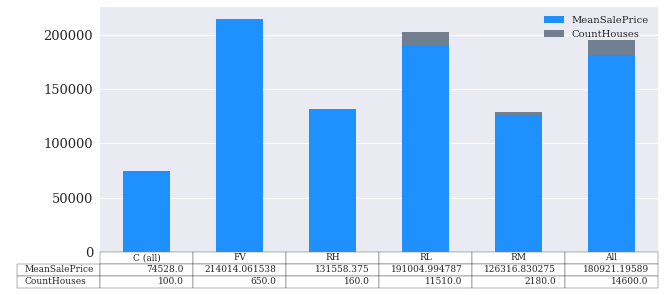

In [68]:
# PLOT 2 columns in one bar (stacked=true)
myplot = X_pvt3.plot(kind='bar',  stacked='True',table=True, 
                     color=['dodgerblue', 'slategray'], fontsize=13)
myplot.axes.get_xaxis().set_visible(False)
plt.show()

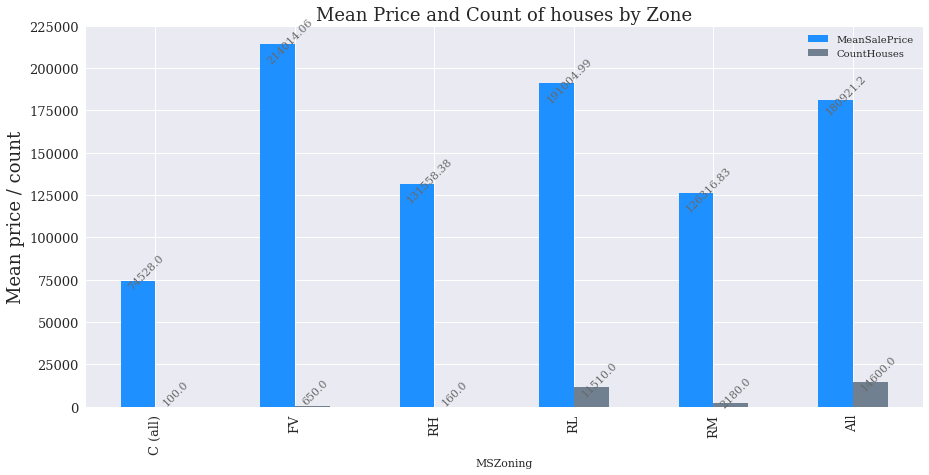

In [69]:
ax = X_pvt3[['MeanSalePrice', 'CountHouses']].plot(kind='bar',
              figsize=(15,7), color=['dodgerblue', 'slategray'], fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Mean Price and Count of houses by Zone",
fontsize=18)
ax.set_ylabel("Mean price / count", fontsize=18);

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.04, i.get_height()+12000, \
            str(round((i.get_height()), 2)), fontsize=11, color='dimgrey',
                rotation=45)

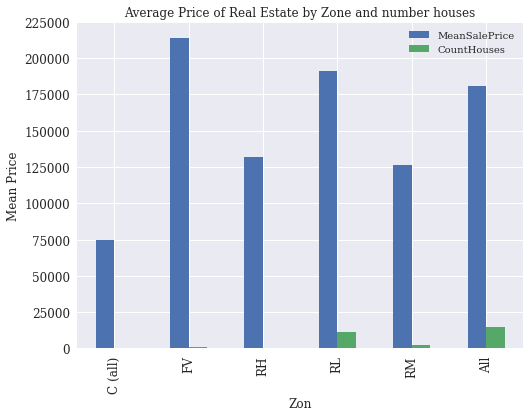

In [70]:
# Bar chart plot
X_pvt2.plot(kind='bar', figsize=(8,6), grid=True, fontsize=12)
plt.title('Average Price of Real Estate by Zone and number houses',fontsize=12)
plt.xlabel('Zon',fontsize=12)
plt.ylabel('Mean Price',fontsize=12)
plt.show()

The RL zone is the one with the most houses available, and it is the second most expensive zone.
<br> The FV zone with very little supply of houses has the most expensive prices.

In [71]:
# Table with average prices in each zone, and count number of houses in each Zone 
X_pvt3 = pd.pivot_table(df_train, index=['MSZoning'],
                            values=['SalePrice'],
                      aggfunc=[np.mean,len], margins=True)
X_pvt3

,mean,len
,SalePrice,SalePrice
MSZoning,,
C (all),74528.000000,10
FV,214014.061538,65
RH,131558.375000,16
RL,191004.994787,1151
RM,126316.830275,218
All,180921.195890,1460


In [72]:
X_pvt3.columns[0]

('mean', 'SalePrice')

In [73]:
# Rename columns
X_pvt3.columns = ['MeanPrice', 'Count']
X_pvt3

,MeanPrice,Count
MSZoning,,
C (all),74528.000000,10
FV,214014.061538,65
RH,131558.375000,16
RL,191004.994787,1151
RM,126316.830275,218
All,180921.195890,1460


In [74]:
# Divide price by 100 for better presentation
X_pvt4 = X_pvt3
X_pvt4.MeanPrice = X_pvt4.MeanPrice / 100
X_pvt4

,MeanPrice,Count
MSZoning,,
C (all),745.280000,10
FV,2140.140615,65
RH,1315.583750,16
RL,1910.049948,1151
RM,1263.168303,218
All,1809.211959,1460


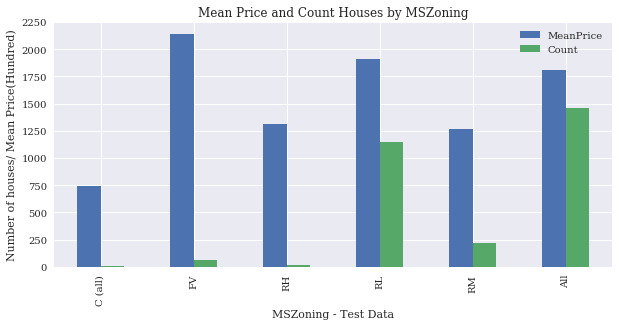

In [75]:
# Plot number houses and mean price by MSZoning 
df = X_pvt4
ax=df.plot.bar()
ax.set_title('Mean Price and Count Houses by MSZoning')
ax.set_ylabel('Number of houses/ Mean Price(Hundred)')
ax.set_xlabel('MSZoning - Test Data')
# Rotação das Labels
g.set_xticklabels(g.get_xticklabels(), rotation=30)

Comparative analysis between the number of houses and their average price per Zone.

# 3. Transform Data

In [360]:
# Erase columns whithout Correlation analysis between data

#del data_X["BsmtFinType1"]
#del data_X["BsmtFinType2"]
#del data_X["BsmtQual"]
#del data_X["CentralAir"]
#del data_X["Condition1"]
#del data_X["Condition2"]
#del data_X["Electrical"]
#del data_X["Exterior1st"]
#del data_X["Exterior2nd"]
#del data_X["GarageQual"]


In [361]:
# We can retrieve the names of features that are in fact non-numerical ‘objects’ as follows, 
# to analyse all object columns and transform them.

data_X.select_dtypes(include = [object]).columns

Index(['Alley', 'BsmtCond', 'BsmtExposure', 'ExterCond', 'ExterQual', 'Fence',
       'FireplaceQu', 'Foundation', 'Functional', 'GarageCond', 'GarageFinish',
       'GarageType', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotConfig', 'MSZoning', 'MasVnrType',
       'MiscFeature', 'PavedDrive', 'PoolQC', 'RoofMatl', 'RoofStyle',
       'SaleCondition', 'SaleType'],
      dtype='object')

In [362]:
# Show object columns
columns = data_X.select_dtypes(include = [object]).columns

dfz = pd.DataFrame(data_X, columns=columns)
dfz.head()

,Alley,BsmtCond,BsmtExposure,ExterCond,ExterQual,Fence,FireplaceQu,Foundation,Functional,GarageCond,...,LotConfig,MSZoning,MasVnrType,MiscFeature,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType
0,None,TA,No,TA,Gd,None,None,PConc,Typ,TA,...,Inside,RL,BrkFace,None,Y,None,CompShg,Gable,Normal,WD
1,None,TA,Gd,TA,TA,None,TA,CBlock,Typ,TA,...,FR2,RL,None,None,Y,None,CompShg,Gable,Normal,WD
2,None,TA,Mn,TA,Gd,None,TA,PConc,Typ,TA,...,Inside,RL,BrkFace,None,Y,None,CompShg,Gable,Normal,WD
3,None,Gd,No,TA,TA,None,Gd,BrkTil,Typ,TA,...,Corner,RL,None,None,Y,None,CompShg,Gable,Abnorml,WD
4,None,TA,Av,TA,Gd,None,TA,PConc,Typ,TA,...,FR2,RL,BrkFace,None,Y,None,CompShg,Gable,Normal,WD


In [363]:
# Verify all distinct values for a column - RoofStyle
data_X["RoofStyle"].value_counts()

Gable      2310
Hip         551
Gambrel      22
Flat         20
Mansard      11
Shed          5
Name: RoofStyle, dtype: int64

In [364]:
# Convert to numbers - RoofStyle
# Create a List whith Values
target_names = data_X["RoofStyle"].unique()
# Create a dictionary whith Values and index
target_dict = {n:i for i, n in enumerate(target_names)}
# Replace values
data_X.RoofStyle = data_X.RoofStyle.replace(target_dict)

In [365]:
# Verify all distinct values for a column - RoofMatl
data_X["RoofMatl"].value_counts()

CompShg    2876
Tar&Grv      23
WdShake       9
WdShngl       7
ClyTile       1
Membran       1
Roll          1
Metal         1
Name: RoofMatl, dtype: int64

In [366]:
# Convert to numbers - RoofMatl
# Create a List whith Values
target_names = data_X["RoofMatl"].unique()
# Create a dictionary whith Values and index
target_dict = {n:i for i, n in enumerate(target_names)}
# Replace values
data_X.RoofMatl = data_X.RoofMatl.replace(target_names)

In [440]:
# Convert to numbers - RoofMatl
data_X.RoofMatl = \
    data_X.RoofMatl.replace({'CompShg':1})

In [367]:
# Verify all distinct values for a column - PoolQC
data_X["PoolQC"].value_counts()

None    2909
Gd         4
Ex         4
Fa         2
Name: PoolQC, dtype: int64

In [368]:
# Most of them are the same values 'None' , let's erase the column
del data_X["PoolQC"]

In [372]:
# Verify all distinct values for a column - PavedDrive
data_X["PavedDrive"].value_counts()

0    2641
1     216
2      62
Name: PavedDrive, dtype: int64

In [374]:
# Convert to numbers - PavedDrive
#data_X.PavedDrive = data_X.PavedDrive.replace({'Y':0, 'N':1, 'P':2})

In [375]:
# Verify all distinct values for a column - MiscFeature
data_X["MiscFeature"].value_counts()

None    2814
Shed      95
Gar2       5
Othr       4
TenC       1
Name: MiscFeature, dtype: int64

In [376]:
# Most of them are the same values 'None' , let's erase the column
del data_X["MiscFeature"]

In [377]:
# Verify all distinct values for a column - MasVnrType
data_X["MasVnrType"].value_counts()

None       1766
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [378]:
# Convert to numbers - MasVnrType
data_X.MasVnrType = \
    data_X.MasVnrType.replace({'None':0, 'BrkFace':1, 'Stone':2, 'BrkCmn':3})

In [379]:
# Verify all distinct values for a column - MSZoning
data_X["MSZoning"].value_counts()

RL         2269
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [380]:
# Convert to numbers - MSZoning
data_X.MSZoning = \
    data_X.MSZoning.replace({'RL':0, 'RM':1, 'FV':2, 'RH':3, 'C (all)':4})

In [381]:
# Verify all distinct values for a column - LotConfig
data_X["LotConfig"].value_counts()

Inside     2133
Corner      511
CulDSac     176
FR2          85
FR3          14
Name: LotConfig, dtype: int64

In [382]:
# Convert to numbers - LotConfig
data_X.LotConfig = \
    data_X.LotConfig.replace({'Inside':0, 'Corner':1, 'CulDSac':2, 'FR2':3, 'FR3':4})

In [383]:
# Verify all distinct values for a column - LandSlope
data_X["LandSlope"].value_counts()

Gtl    2778
Mod     125
Sev      16
Name: LandSlope, dtype: int64

In [384]:
# Most of them are the same values 'Gtl' , let's erase the column
del data_X["LandSlope"]

In [385]:
# Verify all distinct values for a column - LandContour
data_X["LandContour"].value_counts()

Lvl    2622
HLS     120
Bnk     117
Low      60
Name: LandContour, dtype: int64

In [386]:
# Convert to numbers - LandContour
data_X.LandContour = \
    data_X.LandContour.replace({'Lvl':0, 'HLS':1, 'Bnk':2, 'Low':3})

In [387]:
# Verify all distinct values for a column - KitchenQual
data_X["KitchenQual"].value_counts()

TA    1493
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [388]:
# Convert to numbers - KitchenQual
data_X.KitchenQual = \
    data_X.KitchenQual.replace({'TA':0, 'Gd':1, 'Ex':2, 'Fa':3})

In [389]:
# Verify all distinct values for a column - HouseStyle
data_X["HouseStyle"].value_counts()

1Story    1471
2Story     872
1.5Fin     314
SLvl       128
SFoyer      83
2.5Unf      24
1.5Unf      19
2.5Fin       8
Name: HouseStyle, dtype: int64

In [390]:
# Convert to numbers - HouseStyle
data_X.HouseStyle = \
    data_X.HouseStyle.replace({'1Story':0, '2Story':1, '1.5Fin':2, 'SLvl':3, 'SFoyer':4, '2.5Unf':5, '1.5Unf':6, '2.5Fin':7})

In [391]:
# Verify all distinct values for a column - GarageFinish
data_X["GarageFinish"].value_counts()

Unf     1230
RFn      811
Fin      719
None     159
Name: GarageFinish, dtype: int64

In [392]:
# Convert to numbers - GarageType
data_X.GarageFinish = \
    data_X.GarageFinish.replace({'Unf':0, 'RFn':1, 'Fin':2, 'None':3})

In [393]:
# Verify all distinct values for a column - HeatingQC
data_X["HeatingQC"].value_counts()

Ex    1493
TA     857
Gd     474
Fa      92
Po       3
Name: HeatingQC, dtype: int64

In [394]:
# Convert to numbers - GarageType
data_X.HeatingQC = \
    data_X.HeatingQC.replace({'Ex':0, 'TA':1, 'Gd':2, 'Fa':3, 'Po':4})

In [395]:
# Verify all distinct values for a column - Heating
data_X["Heating"].value_counts()

GasA     2874
GasW       27
Grav        9
Wall        6
OthW        2
Floor       1
Name: Heating, dtype: int64

In [396]:
# Most of them are the same values 'GasA     ' , let's erase the column
del data_X["Heating"]

In [397]:
# Verify all distinct values for a column - GarageType
data_X["GarageType"].value_counts()

Attchd     1723
Detchd      779
BuiltIn     186
None        157
Basment      36
2Types       23
CarPort      15
Name: GarageType, dtype: int64

In [398]:
# Convert to numbers - GarageType
data_X.GarageType = \
    data_X.GarageType.replace({'Attchd':0, 'Detchd':1, 'BuiltIn':2, 'None':3, 'Basment':4, '2Types':5, 'CarPort':6})

In [399]:
# Verify all distinct values for a column - GarageCond
data_X["GarageCond"].value_counts()

TA      2654
None     159
Fa        74
Gd        15
Po        14
Ex         3
Name: GarageCond, dtype: int64

In [400]:
# Most of them are the same values ' TA' , let's erase the column
del data_X["GarageCond"]

In [401]:
# Verify all distinct values for a column - Functional
data_X["Functional"].value_counts()

Typ     2719
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [402]:
# Most of them are Typ, let's erase the column
del data_X["Functional"]

In [403]:
# Verify all distinct values for a column - Foundation
data_X["Foundation"].value_counts()

PConc     1308
CBlock    1235
BrkTil     311
Slab        49
Stone       11
Wood         5
Name: Foundation, dtype: int64

In [404]:
# Convert to numbers - Foundation
data_X.Foundation = \
    data_X.Foundation.replace({'PConc':0, 'CBlock':1, 'BrkTil':2, 'Slab':3, 'Stone':4, 'Wood':5})

In [405]:
# Verify all distinct values for a column - FireplaceQu
data_X["FireplaceQu"].value_counts()

None    1420
Gd       744
TA       592
Fa        74
Po        46
Ex        43
Name: FireplaceQu, dtype: int64

In [406]:
# Convert to numbers - FireplaceQu
data_X.FireplaceQu = \
    data_X.FireplaceQu.replace({'None':0, 'Gd':1, 'TA':2, 'Fa':3, 'Po':4, 'Ex':5})

In [407]:
# Verify all distinct values for a column - ExterQual
data_X["Fence"].value_counts()

None     2348
MnPrv     329
GdPrv     118
GdWo      112
MnWw       12
Name: Fence, dtype: int64

In [408]:
# Most of them are None, let's erase the column
del data_X["Fence"]

In [409]:
# Verify all distinct values for a column - ExterQual
data_X["ExterQual"].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [410]:
# Convert to numbers - ExterQua
data_X.ExterQual = \
    data_X.ExterQual.replace({'TA':0, 'Gd':1, 'Ex':2, 'Fa':3})

In [411]:
# Verify all distinct values for a column - ExterCond
data_X["ExterCond"].value_counts()

TA    2538
Gd     299
Fa      67
Ex      12
Po       3
Name: ExterCond, dtype: int64

In [412]:
# Most of them are TA, let's erase the column
del data_X["ExterCond"]

In [414]:
# Verify all distinct values for a column - BsmtExposure
data_X["BsmtExposure"].value_counts()

No      1904
Av       418
Gd       276
Mn       239
None      82
Name: BsmtExposure, dtype: int64

In [415]:
# Convert to numbers - BsmtExposure
data_X.BsmtExposure = \
    data_X.BsmtExposure.replace({'No':0, 'Av':1, 'Gd':2, 'Mn':3, 'None':4})

In [416]:
# Verify all distinct values for a column - BsmtExposure
data_X["BsmtExposure"].value_counts()

0    1904
1     418
2     276
3     239
4      82
Name: BsmtExposure, dtype: int64

In [417]:
# Verify all distinct values for a column - BsmtCond
data_X["BsmtCond"].value_counts()

TA      2606
Gd       122
Fa       104
None      82
Po         5
Name: BsmtCond, dtype: int64

In [418]:
# Most of them are TA, let's erase the column
del data_X["BsmtCond"]

In [419]:
# Verify all distinct values for a column - Alley
data_X["Alley"].value_counts()

None    2721
Grvl     120
Pave      78
Name: Alley, dtype: int64

In [420]:
# Most of them are empty, let's erase the column
del data_X["Alley"]

In [421]:
# Verify all distinct values for a column - SaleType
data_X["SaleType"].value_counts()

WD       2526
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [422]:
# Convert to numbers - SaleType
data_X.SaleType = \
    data_X.SaleType.replace({'WD':0, 'New':1, 'COD':2, 'ConLD':3, 'CWD':4, 'ConLI':5, 'ConLw':6, 'Oth':7, 'Con':8})

In [423]:
# Verify all distinct values for a column - SaleType
data_X["SaleType"].value_counts()

0    2526
1     239
2      87
3      26
4      12
5       9
6       8
7       7
8       5
Name: SaleType, dtype: int64

In [424]:
# Convert to numbers - SaleCondition
# Verify all distinct values for a column - SaleCondition
data_X["SaleCondition"].value_counts()

Normal     2402
Partial     245
Abnorml     190
Family       46
Alloca       24
AdjLand      12
Name: SaleCondition, dtype: int64

In [425]:
# Convert to numbers - SaleCondition
data_X.SaleCondition = \
    data_X.SaleCondition.replace({'Normal':0, 'Partial':1, 'Abnorml':2, 'Family':3, 'Alloca':4, 'AdjLand':5})

In [426]:
# Verify all distinct values for a column - SaleCondition
data_X["SaleCondition"].value_counts()

0    2402
1     245
2     190
3      46
4      24
5      12
Name: SaleCondition, dtype: int64

# 4. Modeling

Using a simple linear model with the sci-kit learn library available for python
<br> Using scikit-learn module for linear models

In [427]:
from sklearn import linear_model

In [441]:
X = data_X.drop('SalePrice',1)
#y = np.log(data_X.SalePrice)
y = data_X["SalePrice"].values

In [442]:
X.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BldgType,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,...,RoofStyle,SaleCondition,SaleType,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,3,0,0,706.0,0.0,1.0,0.0,...,0,0,0,0,8,856.0,0,2003,2003,2008
1,1262,0,0,3,0,2,978.0,0.0,0.0,1.0,...,0,0,0,0,6,1262.0,298,1976,1976,2007
2,920,866,0,3,0,3,486.0,0.0,1.0,0.0,...,0,0,0,0,6,920.0,0,2001,2002,2008
3,961,756,0,3,0,0,216.0,0.0,1.0,0.0,...,0,2,0,0,7,756.0,0,1915,1970,2006
4,1145,1053,0,4,0,1,655.0,0.0,1.0,0.0,...,0,0,0,0,9,1145.0,192,2000,2000,2008


In [443]:
y

array([ 208500.        ,  181500.        ,  223500.        , ...,
        180921.19589041,  180921.19589041,  180921.19589041])

In [444]:
scaler = linear_model.LinearRegression()

In [445]:
count_missing(data_X)

Series([], dtype: float64)


In [446]:
# Count null data in each column
data_X.isnull().sum()

1stFlrSF         0
2ndFlrSF         0
3SsnPorch        0
BedroomAbvGr     0
BldgType         0
BsmtExposure     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtFullBath     0
BsmtHalfBath     0
BsmtUnfSF        0
EnclosedPorch    0
ExterQual        0
FireplaceQu      0
Fireplaces       0
Foundation       0
FullBath         0
GarageArea       0
GarageCars       0
GarageFinish     0
GarageType       0
GarageYrBlt      0
GrLivArea        0
HalfBath         0
HeatingQC        0
HouseStyle       0
Id               0
KitchenAbvGr     0
KitchenQual      0
LandContour      0
LotArea          0
LotConfig        0
LotFrontage      0
LotShape         0
LowQualFinSF     0
MSSubClass       0
MSZoning         0
MasVnrArea       0
MasVnrType       0
MiscVal          0
MoSold           0
Neighborhood     0
OpenPorchSF      0
OverallCond      0
OverallQual      0
PavedDrive       0
PoolArea         0
RoofMatl         0
RoofStyle        0
SaleCondition    0
SalePrice        0
SaleType         0
ScreenPorch 

In [447]:
scaler.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [449]:
y_test_predicted = scaler.predict(X)

In [450]:
y_test_predicted_dollars = np.exp(y_test_predicted)

In [451]:
# Analyse scores
from sklearn.model_selection import cross_val_score

In [452]:
scores = cross_val_score(scaler, X, y, cv=5,
                         scoring = 'neg_mean_squared_error')
 
scores = np.sqrt(abs(scores))
 
print("CV score: ", scores.mean())

CV score:  49963.4063342


In [453]:
# Creating data division for Test and Train
from sklearn.model_selection import train_test_split


In [454]:
X_test, X_train, y_test, y_train = \
train_test_split(X, y, test_size=0.8, shuffle = True)
 
scaler.fit(X_train, y_train)
y_test_predicted = scaler.predict(X_test)

In [459]:
#y_test_predicted

In [460]:
# Compute the errors made by our model both as dollar values and as percentages 
# of the true sale price:

#USD_errors = np.exp(y_test) - np.exp(y_test_predicted)
USD_errors = y_test - y_test_predicted
percent_errors = USD_errors/np.exp(y_test) * 100

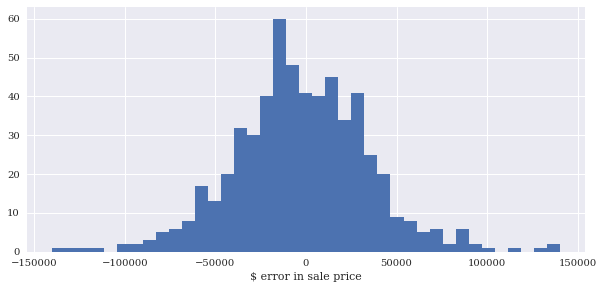

In [463]:
# Plot results 
plt.hist(USD_errors, bins = np.linspace(-140000, 140000, 40))
plt.xlabel('$ error in sale price')

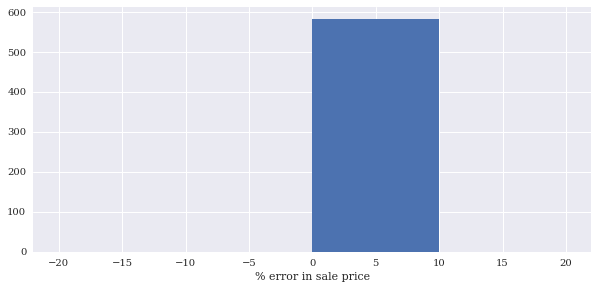

In [467]:
# Plot results 
plt.hist(percent_errors, bins = np.linspace(-20,20,5))
plt.xlabel('% error in sale price')